<a href="https://colab.research.google.com/github/charlie11438/note/blob/master/python_stats/stats0508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# python統計筆記

## 2019-05-08

大樣本檢定

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
from scipy import stats

In [0]:
#生成隨機數據,群體平均數之差為0.5
n1=list(3*np.random.randn(1000)*4.5)
n2=list(3.5*np.random.randn(1000)*4.5)
original=pd.DataFrame()
original['sample1']=list(random.sample(n1,100))
original['sample2']=list(random.sample(n2,100))


In [3]:
original.head()

,sample1,sample2
0,9.633984,12.010103
1,19.595802,1.801423
2,36.632713,-4.082185
3,4.716876,-17.981864
4,-33.437686,-7.282355


## 敘述性統計

In [0]:
descri=pd.DataFrame()
des1=list(stats.describe(original.loc[:,'sample1']))
des2=list(stats.describe(original.loc[:,'sample2']))
indexlist=['n','(min,max)','mean','variance','skewness','kurtosis']
descri['sample1']=des1
descri['sample2']=des2
descri.index=indexlist

In [12]:
descri

,sample1,sample2
n,100,100
"(min,max)","(-33.437686055382315, 36.63271280981151)","(-37.388888549129305, 43.50912666440587)"
mean,0.156859,-0.0514723
variance,218.851,257.612
skewness,0.023181,0.0134183
kurtosis,-0.187861,-0.0139908


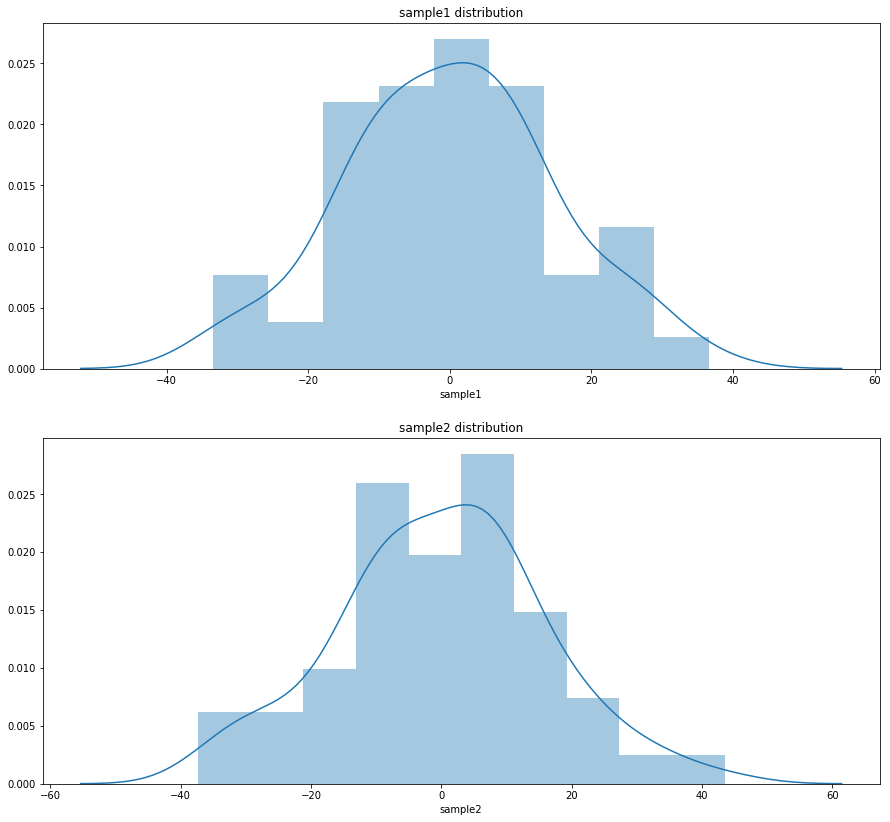

In [6]:
z0=plt.figure(figsize=(15,14))
z0.add_subplot(2,1,1)
sns.distplot(original.loc[:,'sample1'])
plt.title('sample1 distribution')
z0.add_subplot(2,1,2)
sns.distplot(original.loc[:,'sample2'])
plt.title('sample2 distribution')
plt.show()

# 95%信賴區間

stats.norm.interval(alpha,loc,scale)

alpha=信賴係數

loc=mean

scale=標準誤

In [7]:
print('sample1 95% 信賴區間:')
stats.norm.interval(0.05,loc=original.loc[:,'sample1'].mean(),scale=stats.sem(original.loc[:,'sample1']))

sample1 95% 信賴區間:


(0.06409274472831457, 0.24962465075195067)

In [8]:
print('sample2 95% 信賴區間:')
stats.norm.interval(0.05,loc=original.loc[:,'sample2'].mean(),scale=stats.sem(original.loc[:,'sample2']))

sample2 95% 信賴區間:


(-0.15211857531200074, 0.04917390215482936)

# 假說檢定

H0:mu1-mu2=0

H1:mu1-mu2!=0


檢定量z*=(xbar-ybar-0)/(sqrt(s1^2/n1)+sqrt(s2^2/n2))

alpha=0.05

雙尾檢定:

if |z*|>=z(alpha/2) then reject H0(In rejection region)

else not reject H0


In [0]:
def zstar(data1,data2):
  import math
  up=data1.mean()/data2.mean()
  s1=data1.std()
  s2=data2.std()
  n1=len(data1)
  n2=len(data2)
  down=math.sqrt((s1**2)/n1)+math.sqrt((s2**2)/n2)
  return up/down

In [10]:
alpha=0.05
teststats=zstar(original.loc[:,'sample1'],original.loc[:,'sample2'])
zalpha=stats.norm.pdf(alpha/2)
if math.fabs(teststats)>=zalpha:
  print('|',teststats,'|','>=',zalpha)
  print('reject H0')
else:
  print(teststats,'<',zalpha)
  print('not reject H0')

| -0.9880191479352602 | >= 0.39881763041638185
reject H0


# ANOVA檢定

H0:mu1=mu2=mu3

H1:至少有一等號不成立

alpha=0.05

In [14]:
n3=list(4*np.random.randn(1000)*5)
original['sample3']=random.sample(n3,100)
original.head()

,sample1,sample2,sample3
0,9.633984,12.010103,-15.814976
1,19.595802,1.801423,-22.409811
2,36.632713,-4.082185,20.573157
3,4.716876,-17.981864,2.302910
4,-33.437686,-7.282355,-9.522763


In [15]:
descri['sample3']=list(stats.describe(original.loc[:,'sample3']))
descri

,sample1,sample2,sample3
n,100,100,100
"(min,max)","(-33.437686055382315, 36.63271280981151)","(-37.388888549129305, 43.50912666440587)","(-49.68607275436371, 48.97714529751781)"
mean,0.156859,-0.0514723,1.21103
variance,218.851,257.612,447.447
skewness,0.023181,0.0134183,-0.108756
kurtosis,-0.187861,-0.0139908,-0.340913


In [17]:
print('sample3 95%信賴區間')
stats.norm.interval(0.05,loc=original.loc[:,'sample3'].mean(),scale=stats.sem(original.loc[:,'sample3']))

sample3 95%信賴區間


(1.0783884324449775, 1.343675041876708)

In [24]:
anova=np.array(stats.f_oneway(original.loc[:,'sample1'],original.loc[:,'sample2'],original.loc[:,'sample3']))
an=pd.DataFrame()
an['value']=anova
an.index=['statistic','p-value']
if float(an.loc[an.index=='p-value','value'])>0.05:
  print('not reject H0')
else:
  print('reject H0')

not reject H0
